# Exercise Notebook

In [1]:
import main_tf as mtf
import pandas as pd
import tensorflow as tf

In [2]:
%load_ext autoreload
%autoreload 2

## Linear Estimator

In [3]:
training_file = 'https://storage.googleapis.com/tf-datasets/titanic/train.csv'

Training Set:
   survived     sex   age  n_siblings_spouses  parch     fare  class     deck  \
0         0    male  22.0                   1      0   7.2500  Third  unknown   
1         1  female  38.0                   1      0  71.2833  First        C   
2         1  female  26.0                   0      0   7.9250  Third  unknown   
3         1  female  35.0                   1      0  53.1000  First        C   
4         0    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  

Statstics on Training Set:
         survived         age  n_siblings_spouses       parch        fare
count  627.000000  627.000000          627.000000  627.000000  627.000000
mean     0.387560   29.631308            0.545455    0.379585   34.385399
std      0.487582   12.511818            1.151090    0.792999   54.597730
min      0.000000    0.750000        

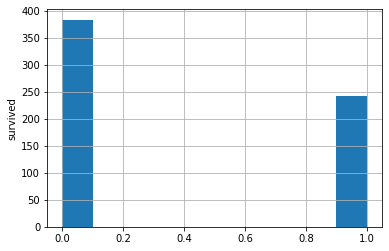

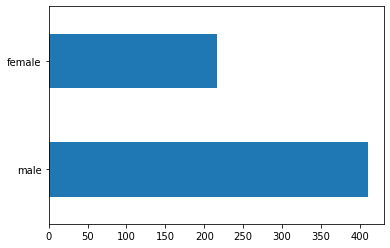

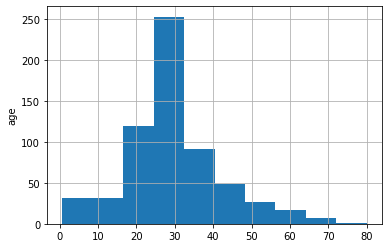

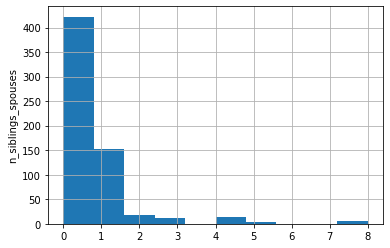

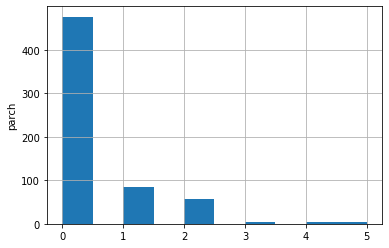

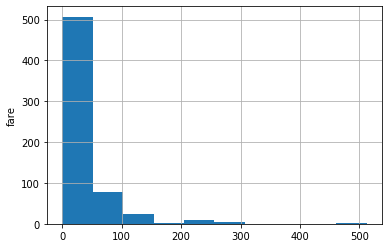

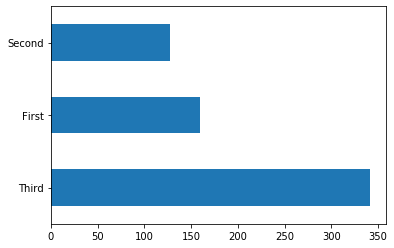

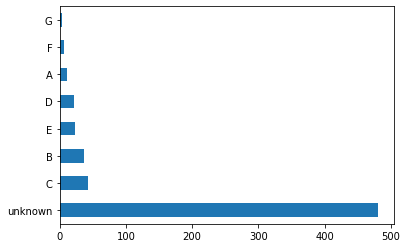

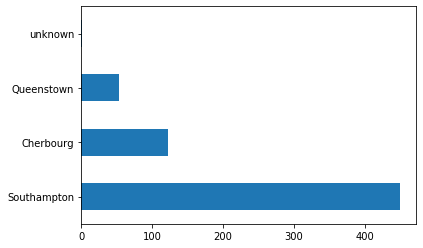

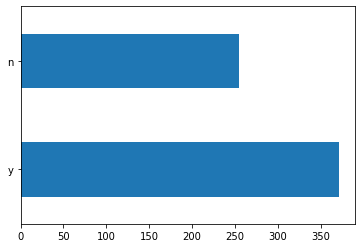

In [4]:
df = mtf.analyse_input(training_file)

In [5]:
output_field = 'survived'

In [6]:
trained_linear_estimator = mtf.train_linear_estimator(output_field = output_field, training_file = training_file, num_epochs = 10, batch_size = 32)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, default_value=-1, num_oov_buckets=0), NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='n_siblings_spouses', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='parch', shape=(1,), defau

In [7]:
evaluation_file = 'https://storage.googleapis.com/tf-datasets/titanic/eval.csv'
output_field = 'survived'

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-05-02T15:59:24Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpo6va8e30/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.89159s
INFO:tensorflow:Finished evaluation at 2020-05-02-15:59:25
INFO:tensorflow:Saving dict for global step 200: accuracy = 0.7651515, accuracy_

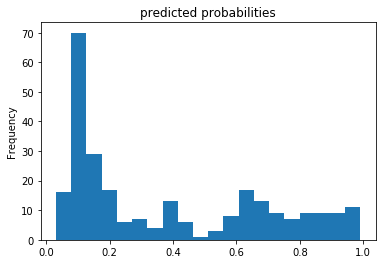

In [8]:
results, prediction_df = mtf.evaluate_linear_estimator(trained_linear_estimator, output_field, evaluation_file)

In [9]:
results

{'accuracy': 0.7651515,
 'accuracy_baseline': 0.625,
 'auc': 0.83875114,
 'auc_precision_recall': 0.79134905,
 'average_loss': 0.47076103,
 'label/mean': 0.375,
 'loss': 0.4586702,
 'precision': 0.69473684,
 'prediction/mean': 0.38329455,
 'recall': 0.6666667,
 'global_step': 200}

In [10]:
prediction_df

,logits,logistic,probabilities,class_ids,classes,all_class_ids,all_classes
0,[-2.4702442],[0.07797068],"[0.9220293, 0.077970676]",[0],[b'0'],"[0, 1]","[b'0', b'1']"
1,[-0.52613366],[0.3714191],"[0.62858087, 0.37141907]",[0],[b'0'],"[0, 1]","[b'0', b'1']"
2,[0.85316455],[0.7012306],"[0.29876944, 0.7012306]",[1],[b'1'],"[0, 1]","[b'0', b'1']"
3,[0.52985764],[0.6294499],"[0.3705501, 0.6294499]",[1],[b'1'],"[0, 1]","[b'0', b'1']"
4,[-1.1647385],[0.23780733],"[0.76219267, 0.23780735]",[0],[b'0'],"[0, 1]","[b'0', b'1']"
...,...,...,...,...,...,...,...
259,[1.7390882],[0.8505712],"[0.14942878, 0.8505712]",[1],[b'1'],"[0, 1]","[b'0', b'1']"
260,[-2.4212494],[0.08156661],"[0.9184334, 0.08156662]",[0],[b'0'],"[0, 1]","[b'0', b'1']"
261,[0.31796268],[0.5788277],"[0.42117235, 0.5788277]",[1],[b'1'],"[0, 1]","[b'0', b'1']"
262,[-1.5107921],[0.18082142],"[0.8191786, 0.18082143]",[0],[b'0'],"[0, 1]","[b'0', b'1']"


In [11]:
mydf = prediction_df

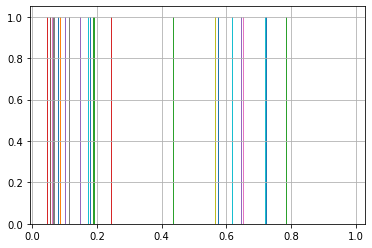

In [12]:
prediction_df['logistic'].hist()

## Classification
diffirentiate between data points and separate them into classes.
Returns the probability that an entry is inside a class.

In [13]:
mtf.analyse_input_classification()

   SepalLength  SepalWidth  PetalLength  PetalWidth  Species
0          6.4         2.8          5.6         2.2        2
1          5.0         2.3          3.3         1.0        1
2          4.9         2.5          4.5         1.7        2
3          4.9         3.1          1.5         0.1        0
4          5.7         3.8          1.7         0.3        0


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0
...,...,...,...,...,...
115,5.5,2.6,4.4,1.2,1
116,5.7,3.0,4.2,1.2,1
117,4.4,2.9,1.4,0.2,0
118,4.8,3.0,1.4,0.1,0


In [14]:
output_field = 'Species'

In [15]:
train_df, train_df_y, my_feature_columns = mtf.preprocess_dataset_classification(output_field)

   SepalLength  SepalWidth  PetalLength  PetalWidth  Species
0          6.4         2.8          5.6         2.2        2
1          5.0         2.3          3.3         1.0        1
2          4.9         2.5          4.5         1.7        2
3          4.9         3.1          1.5         0.1        0
4          5.7         3.8          1.7         0.3        0
(120, 4)
[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [16]:
classifier = mtf.train_classifier(output_field)

   SepalLength  SepalWidth  PetalLength  PetalWidth  Species
0          6.4         2.8          5.6         2.2        2
1          5.0         2.3          3.3         1.0        1
2          4.9         2.5          4.5         1.7        2
3          4.9         3.1          1.5         0.1        0
4          5.7         3.8          1.7         0.3        0
(120, 4)
[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpsu7jld_6', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_se

In [17]:
mtf.evaluate_classifier(classifier, output_field)

   SepalLength  SepalWidth  PetalLength  PetalWidth  Species
0          5.9         3.0          4.2         1.5        1
1          6.9         3.1          5.4         2.1        2
2          5.1         3.3          1.7         0.5        0
3          6.0         3.4          4.5         1.6        1
4          5.5         2.5          4.0         1.3        1
(30, 4)
[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to

In [18]:
# Here is some example input and expected classes you can try above
expected = ['Setosa', 'Versicolor', 'Virginica']
predict_x = {
    'SepalLength': [5.1, 5.9, 6.9],
    'SepalWidth': [3.3, 3.0, 3.1],
    'PetalLength': [1.7, 4.2, 5.4],
    'PetalWidth': [0.5, 1.5, 2.1],
}

In [19]:
mtf.classifier_predictions(classifier, output_field)

['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
Please type numeric values as prompted.
SepalLength: 5.1
SepalWidth: 3.3
PetalLength: 1.7
PetalWidth: 0.5
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpsu7jld_6/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction is "Setosa" (37.0%)


## Clustering
groupping data points. (unsupervised learning algorithm).
you need to know how many clusters you want.

## Hidden Markov Models
deals with probability distribution.
calculate probability based on data.
"hidden" because we never interact with the states, but with the observation.
The point is to predict future events based on past events.

In [ ]:
mtf.hidden_markov_model()

[autoreload of _frozen_importlib failed: Traceback (most recent call last):
  File "/home/andrea/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/andrea/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/home/andrea/anaconda3/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/andrea/anaconda3/lib/python3.7/importlib/__init__.py", line 166, in reload
    spec = module.__spec__ = _bootstrap._find_spec(name, pkgpath, target)
AttributeError: module 'importlib._bootstrap' has no attribute '_find_spec'
]
[autoreload of _frozen_importlib_external failed: Traceback (most recent call last):
  File "/home/andrea/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/andrea/anac